<a href="https://colab.research.google.com/github/TSHABBA01/JavaPrograms/blob/main/Pollutants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sebokeng_data spreadsheet.xlsx.xlsx to sebokeng_data spreadsheet.xlsx (2).xlsx
✅ Data loaded successfully. First 5 rows:
   sebSO2  sebNO2  sebO3  sebPM25  sebPM10
0     NaN     NaN    NaN      NaN      NaN
1     NaN     NaN    NaN      NaN      NaN
2     NaN     NaN    NaN      NaN      NaN
3     NaN     NaN    NaN      NaN      NaN
4     NaN     NaN    NaN      NaN      NaN

🔍 Your columns are: ['sebSO2', 'sebNO2', 'sebO3', 'sebPM25', 'sebPM10']

🔍 Missing data percentages:
sebSO2     43.50
sebNO2     39.22
sebO3      29.51
sebPM25    45.23
sebPM10    46.28
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



🎯 Imputation complete. Sample imputed values:
      sebSO2     sebNO2      sebO3    sebPM25   sebPM10
0  13.170589  25.250339  55.154264  30.782889  44.65077
1  13.170589  25.250339  55.154264  30.782889  44.65077
2  13.170589  25.250339  55.154264  30.782889  44.65077
3  13.170589  25.250339  55.154264  30.782889  44.65077
4  13.170589  25.250339  55.154264  30.782889  44.65077


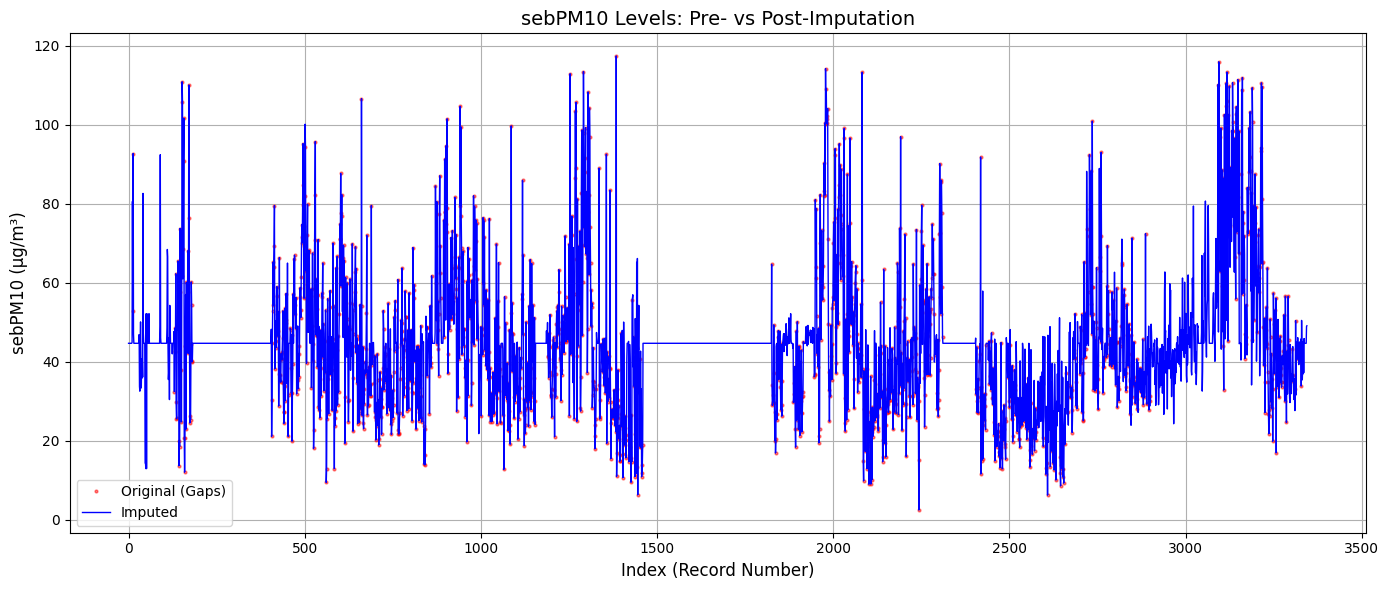

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🚀 All tasks completed! Downloaded files:
- Imputed data: sebokeng_imputed.xlsx
- PM10 comparison plot: sebPM10_imputation_comparison.png
- Descriptive stats: descriptive_statistics.xlsx


In [15]:
# -*- coding: utf-8 -*-
"""Sebokeng Air Quality Data Imputation (Fixed).ipynb"""

# Install required packages
!pip install openpyxl scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from google.colab import files

# =============================================
# 1. DATA LOADING (ADAPTED FOR YOUR DATASET)
# =============================================

# Upload your Excel file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

print("✅ Data loaded successfully. First 5 rows:")
print(data.head())

# Check column names
print("\n🔍 Your columns are:", list(data.columns))

# =============================================
# 2. DATA PREPROCESSING (UPDATED)
# =============================================

def clean_data(df):
    """Clean air quality data without requiring Date column"""
    # Remove negative values (< -1)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].where(df[numeric_cols] >= -1)

    # Remove outliers (>3 SDs from column means)
    for col in numeric_cols:
        col_mean = df[col].mean()
        col_std = df[col].std()
        df[col] = np.where(
            abs(df[col] - col_mean) > 3*col_std,
            np.nan,
            df[col]
        )
    return df

cleaned_data = clean_data(data.copy())

# Calculate missing data percentages
missing_percent = cleaned_data.isnull().mean() * 100
print("\n🔍 Missing data percentages:")
print(missing_percent.round(2))

# =============================================
# 3. MICE IMPUTATION (UNCHANGED)
# =============================================

imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=42
)

numeric_data = cleaned_data.select_dtypes(include=[np.number])
imputed_data = imputer.fit_transform(numeric_data)

imputed_df = pd.DataFrame(imputed_data, columns=numeric_data.columns)

# Preserve non-numeric columns if they exist
for col in cleaned_data.columns:
    if col not in numeric_data.columns:
        imputed_df[col] = cleaned_data[col]

print("\n🎯 Imputation complete. Sample imputed values:")
print(imputed_df.head())

# =============================================
# 4. VISUALIZATION (ADAPTED)
# =============================================

def plot_imputation(original, imputed, pollutant='sebPM10'):
    """Plot imputation results using index as x-axis"""
    plt.figure(figsize=(14, 6))
    plt.plot(original[pollutant], 'r.', alpha=0.5,
             label='Original (Gaps)', markersize=4)
    plt.plot(imputed[pollutant], 'b-', linewidth=1,
             label='Imputed')
    plt.title(f"{pollutant} Levels: Pre- vs Post-Imputation", fontsize=14)
    plt.xlabel("Index (Record Number)", fontsize=12)
    plt.ylabel(f"{pollutant} (µg/m³)", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{pollutant}_imputation_comparison.png", dpi=300)
    plt.show()

# Plot for PM10 (change to your target column)
plot_imputation(cleaned_data, imputed_df, 'sebPM10')

# =============================================
# 5. EXPORT RESULTS (UNCHANGED)
# =============================================

output_file = "sebokeng_imputed.xlsx"
imputed_df.to_excel(output_file, index=False)

stats = imputed_df.describe(percentiles=[.25, .75]).transpose()
stats['missing_percent'] = missing_percent
stats.to_excel("descriptive_statistics.xlsx")

files.download(output_file)
files.download("sebPM10_imputation_comparison.png")
files.download("descriptive_statistics.xlsx")

print("\n🚀 All tasks completed! Downloaded files:")
print(f"- Imputed data: {output_file}")
print("- PM10 comparison plot: sebPM10_imputation_comparison.png")
print("- Descriptive stats: descriptive_statistics.xlsx")

In [16]:
print(data.columns)

Index(['sebSO2', 'sebNO2', 'sebO3', 'sebPM25', 'sebPM10'], dtype='object')
